# **Wine Analysis: Clustering**

This project attempts to demonstrate various clustering techniques and dimensionality reduction. More specifically, a dataset containing three different wines in the same region will be grouped through the unsupervised learning of their 13 characteristics. The data will first be scaled and then will have its dimensionality reduced through the use of Principal Component Analysis. After that, the data will be clustered into three groups through the use of the k-Means and t-SNE clustering algorithms. 

Table of Contents:
* [About the Data](#data)
* [Set Up](#setup)
* [Exploratory Data Analysis](#eda)
    - [Data Structure](#structure)
    - [Histograms](#hist)
    - [Box Plots](#box)
    - [Heat Map](#heatmap)
    - [EDA Summary](#edasummary)
* [Data Preprocessing](#datapre)
    - [Scaling Data](#scaling)
    - [Principal Component Analysis](#pca)
* [Clustering](#clustering)
    - [Dendrogram](#dendro)
    - [Elbow Method](#elbow)
    - [k-Means](#kmeans)
    - [t-SNE](#tsne)
* [Conclusion](#conclusion)

<a id="data"></a>
# **About the Data**

This dataset is adapted from the Wine Data Set from https://archive.ics.uci.edu/ml/datasets/wine by removing the information about the types of wine for unsupervised learning.

The following descriptions are adapted from the UCI webpage:

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

The attributes are:
- Alcohol
- Malic acid
- Ash
- Alcalinity of ash
- Magnesium
- Total phenols
- Flavanoids
- Nonflavanoid phenols
- Proanthocyanins
- Color intensity
- Hue
- OD280/OD315 of diluted wines
- Proline

This dataset is licensed under a Creative Commons Attribution 4.0 International (CC BY 4.0) license.

https://www.kaggle.com/datasets/harrywang/wine-dataset-for-clustering?datasetId=626341&sortBy=voteCount

<a id="setup"></a>
# **Set Up**

In [1]:
# Importing and loading necessary packages
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [2]:
# Importing data
data = pd.read_csv('/kaggle/input/wine-dataset-for-clustering/wine-clustering.csv')

<a id="eda"></a>
# **Exploratory Data Analysis**

<a id="structure"></a>
## Data Structure

In [3]:
# Viewing data.head()
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


By using data.head() we can quickly view the structure of the first 5 entries of the data. Here we can see examples of how the data looks and what values we can expect to see under each column. 

In [4]:
# Viewing data.info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


By using data.info(), we can determine the total number of entries, or rows, in this dataset. Here, we can see that there are 178 entries with 13 features, or columns. Furthermore, all columns have numerical data types, i.e. float64 or int64. 

In [5]:
# Checking for any null values
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

By using data.isna(), we can sum any potential null values in each of the 13 columns. Fortunately, no null values were found. While this dataset is already pretty clean, we will be preprocessing the data later on in order to prepare it for clustering. 

<a id="hist"></a>
## Histograms

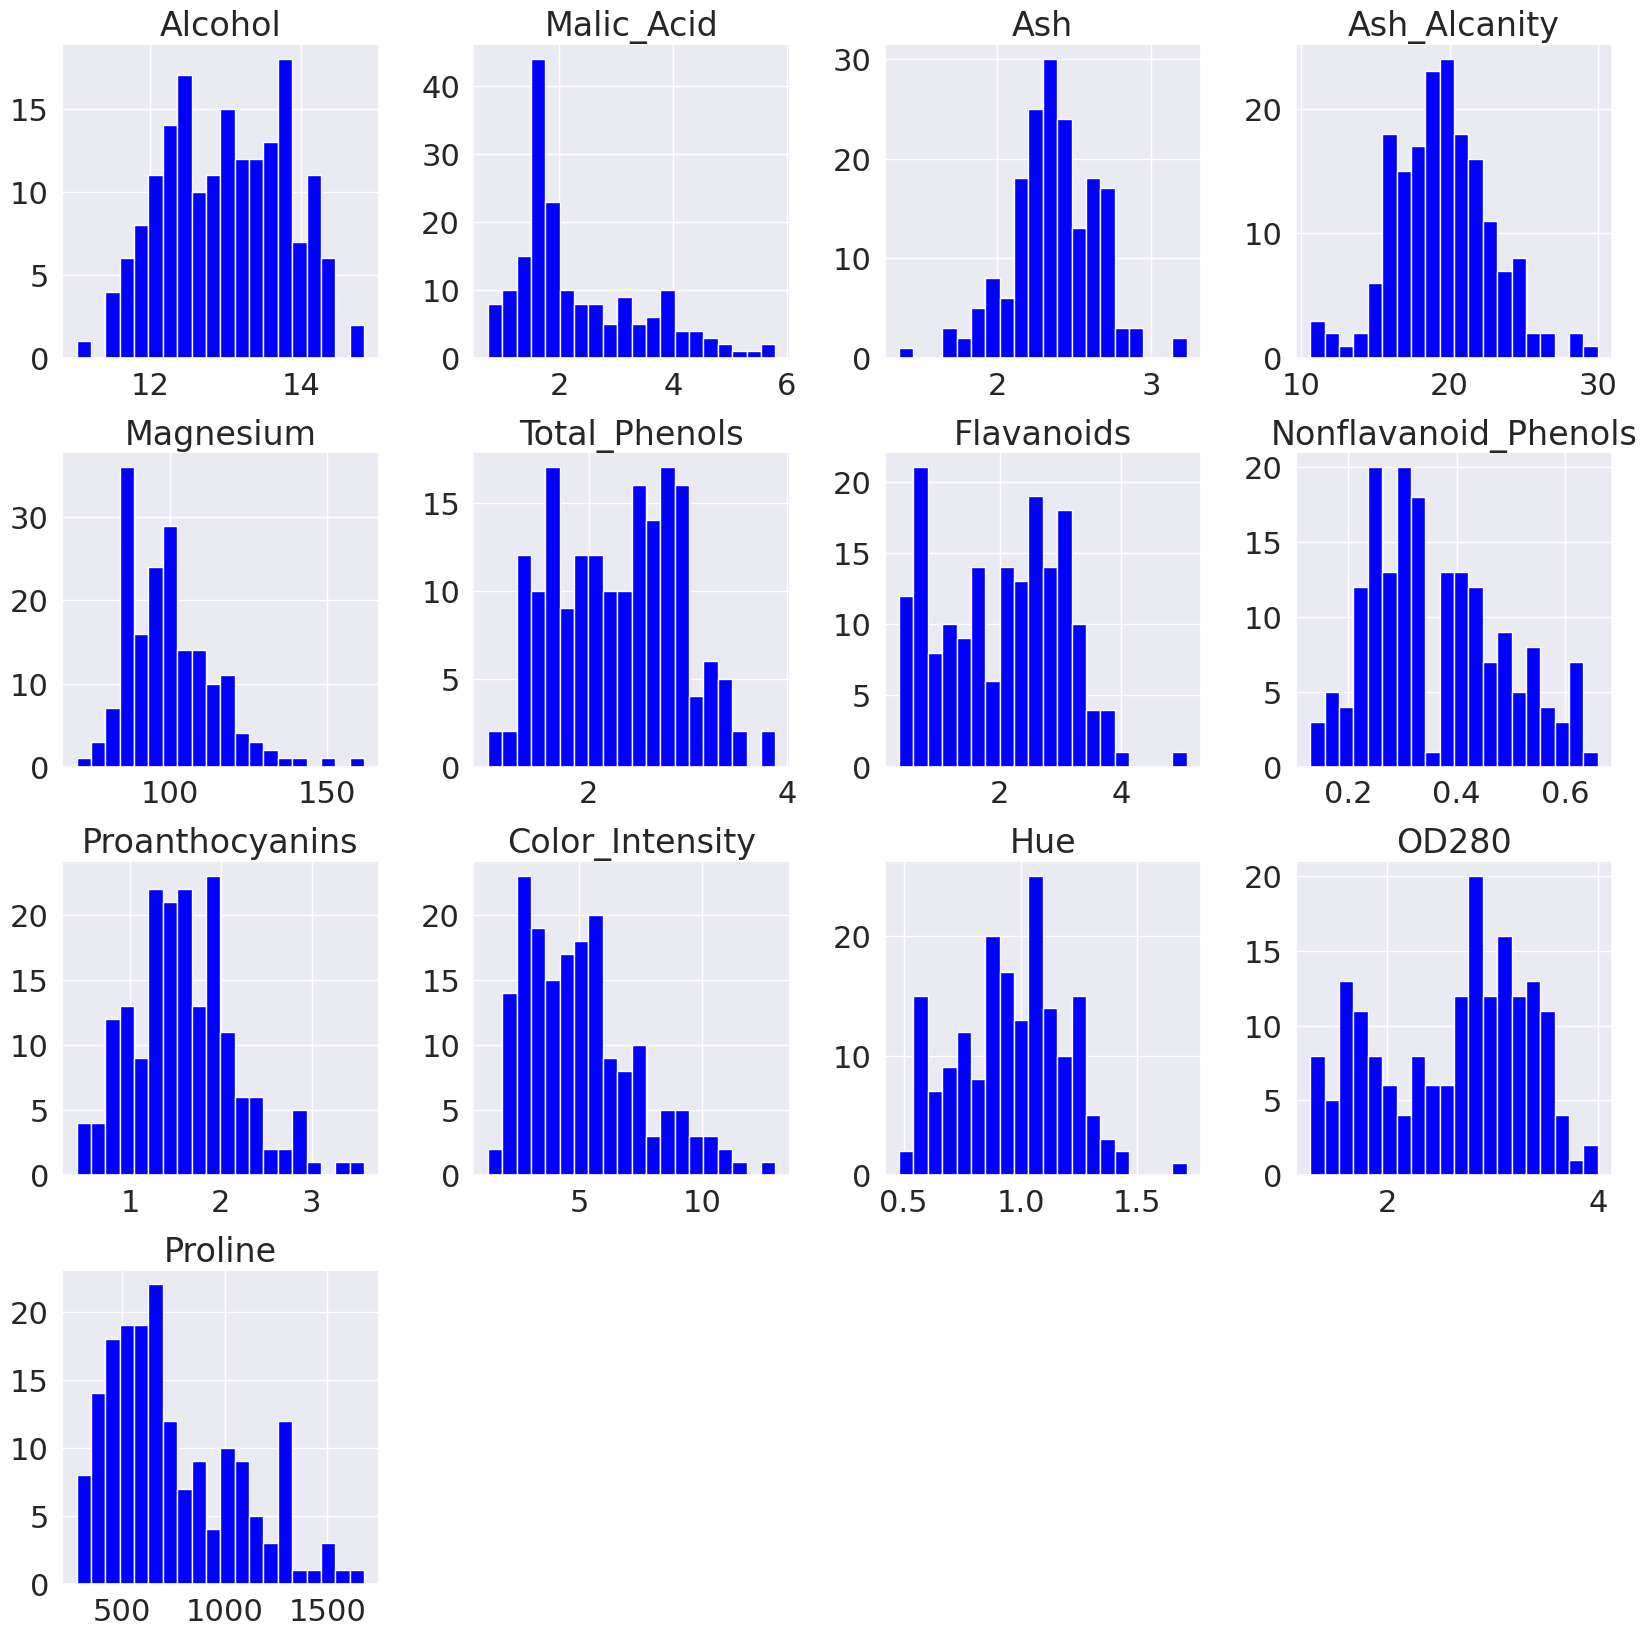

In [6]:
# Creating histograms of features to view data distribution
sns.set(style='darkgrid',font_scale=2, rc={'figure.figsize':(20,20)})
ax=data.hist(bins=20,color='blue' )

The histograms above give us insight into the distrubtion of our data. Here, we can see the distribution of values for each feature. At a glance, Proline, Color_Intensity, Magnesium, and Malic_Acid appear to have higher distributions of data towards lower values (the left side of the histograms). All other features appear to have relatively more balanced distribution. We can gain further insight into the distribution of the dataset by using the .skew() function (below). 

In [7]:
# Checking the skew of the data
data.skew()

Alcohol                -0.051482
Malic_Acid              1.039651
Ash                    -0.176699
Ash_Alcanity            0.213047
Magnesium               1.098191
Total_Phenols           0.086639
Flavanoids              0.025344
Nonflavanoid_Phenols    0.450151
Proanthocyanins         0.517137
Color_Intensity         0.868585
Hue                     0.021091
OD280                  -0.307285
Proline                 0.767822
dtype: float64

By using data.skew(), we can further determine the distribution of data for each feature. A feature with a skew of 0 would represent data that has perfectly balanced distribution. Features with skews greater than 0 have a higher distribution of data towards the left, and features with skews less than 0 have a higher distribution towards the right. Here, we can confirm that Proline, Color_Intensity, Magnesium, and Malic_Acid have significant skews towards the left. In contrast, OD280 has the highest skew towards the right side of the data. Hue appears to have the most balanced distribution of data, with a skew of only 0.021. 

<a id="box"></a>
## Box Plots

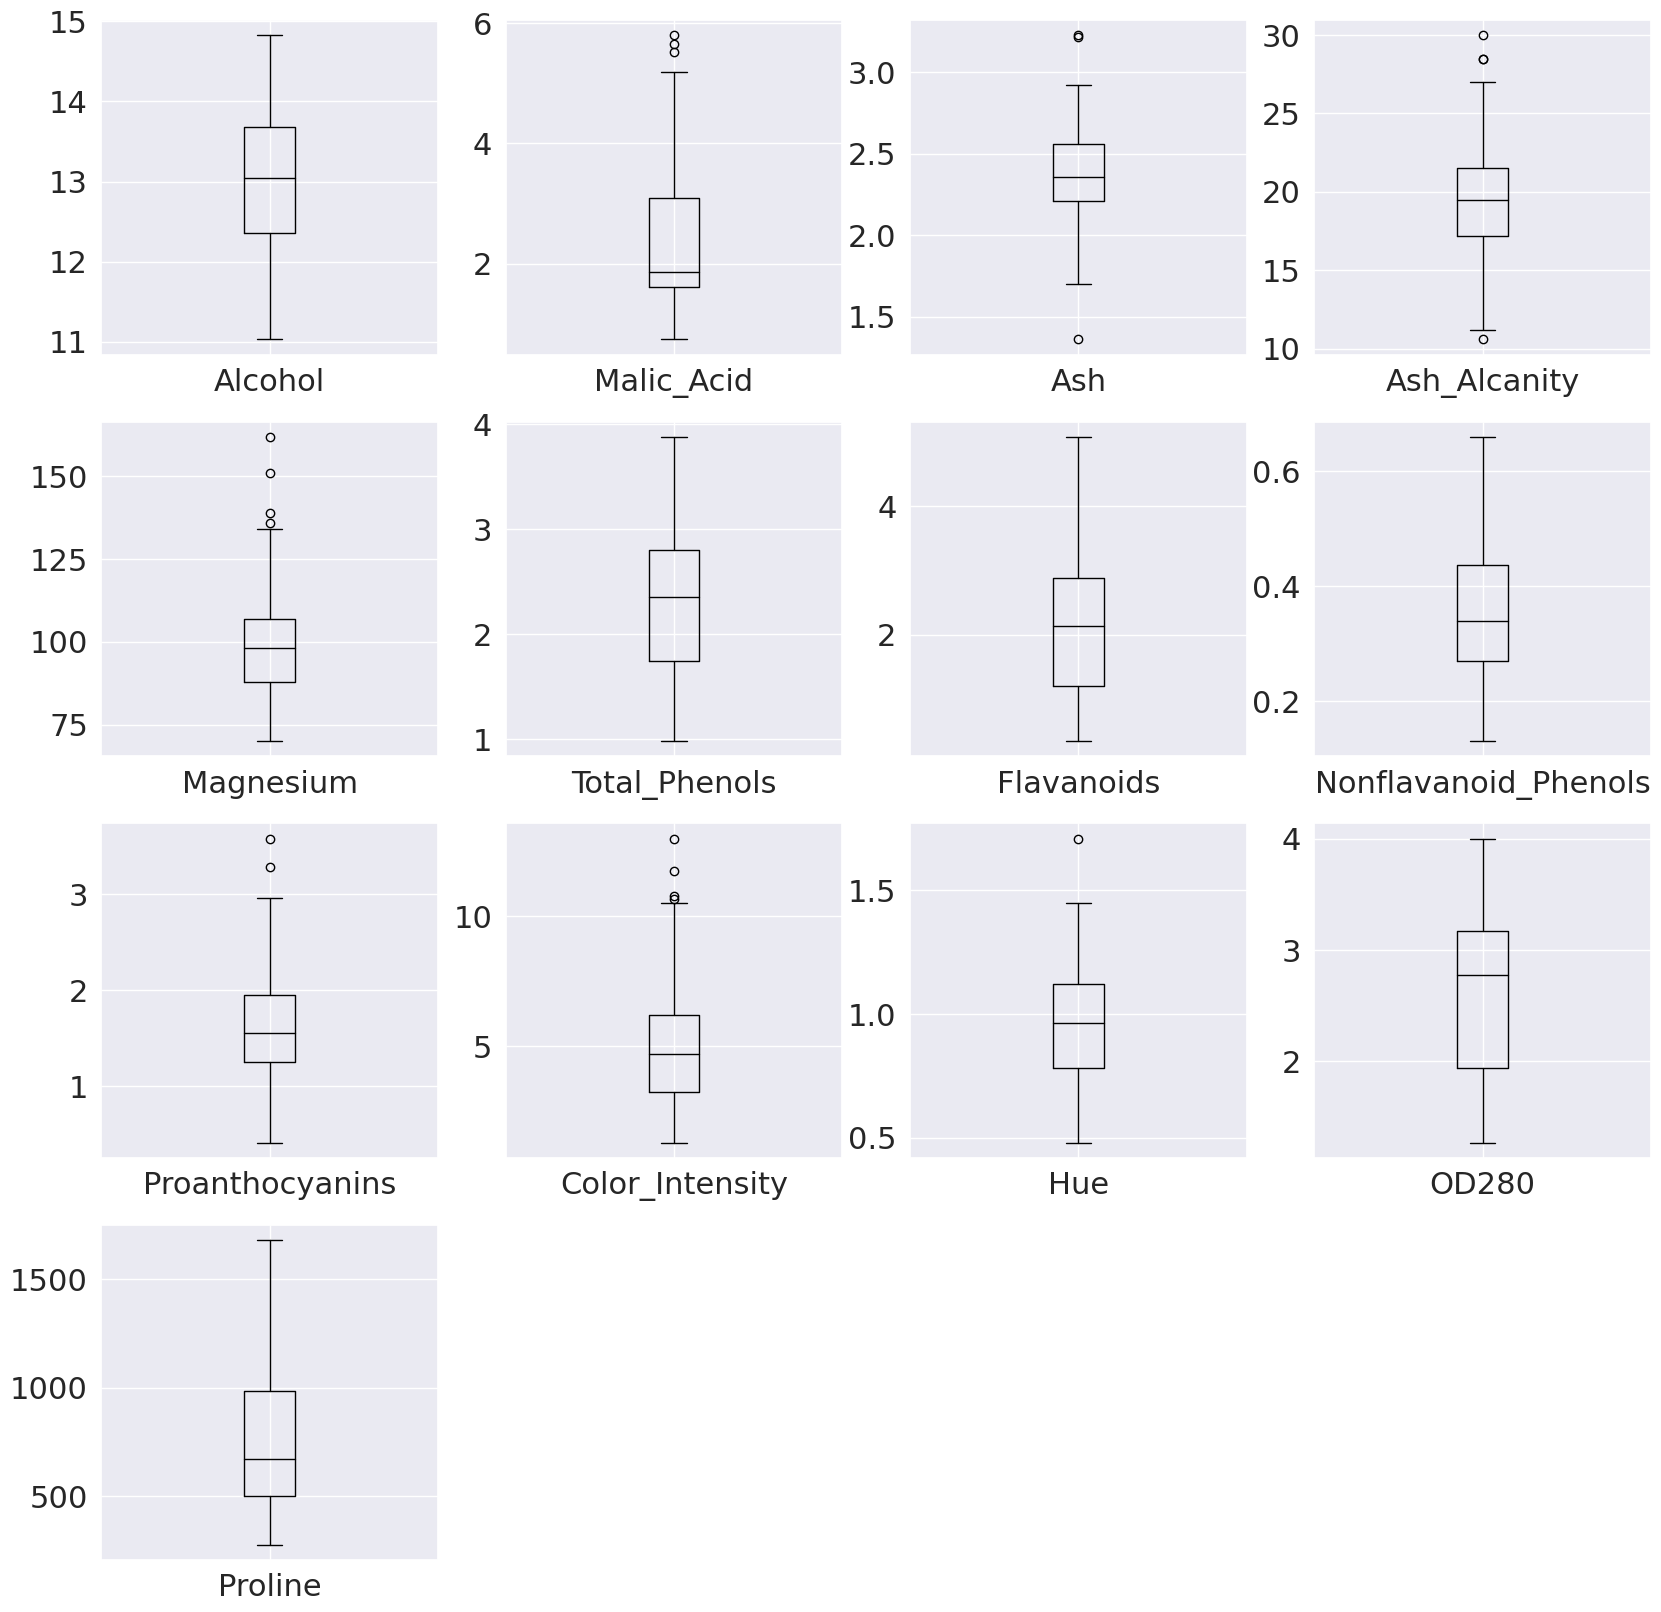

In [8]:
# Plotting the distribution of data with boxplots
data.plot( kind = 'box', subplots = True, layout = (4,4), sharex = False, sharey = False,color='black')
plt.show()

The box plots above provide another look at the distribution of the data. For example, the high left-sided skew of Malic_Acid can be interpreted by the line closer to the bottom of its box, i.e. the data is skewed towards lower values. These box plots also highlight outliers. For example, hue has an outlier value that exists outside of its average distribution of data. While outliers can be removed to potentially increase the accuracy of implemented models, I have decided to keep the data as is. This helps us maintain the most realistic picture of the data.

<a id="heatmap"></a>
## Heatmap

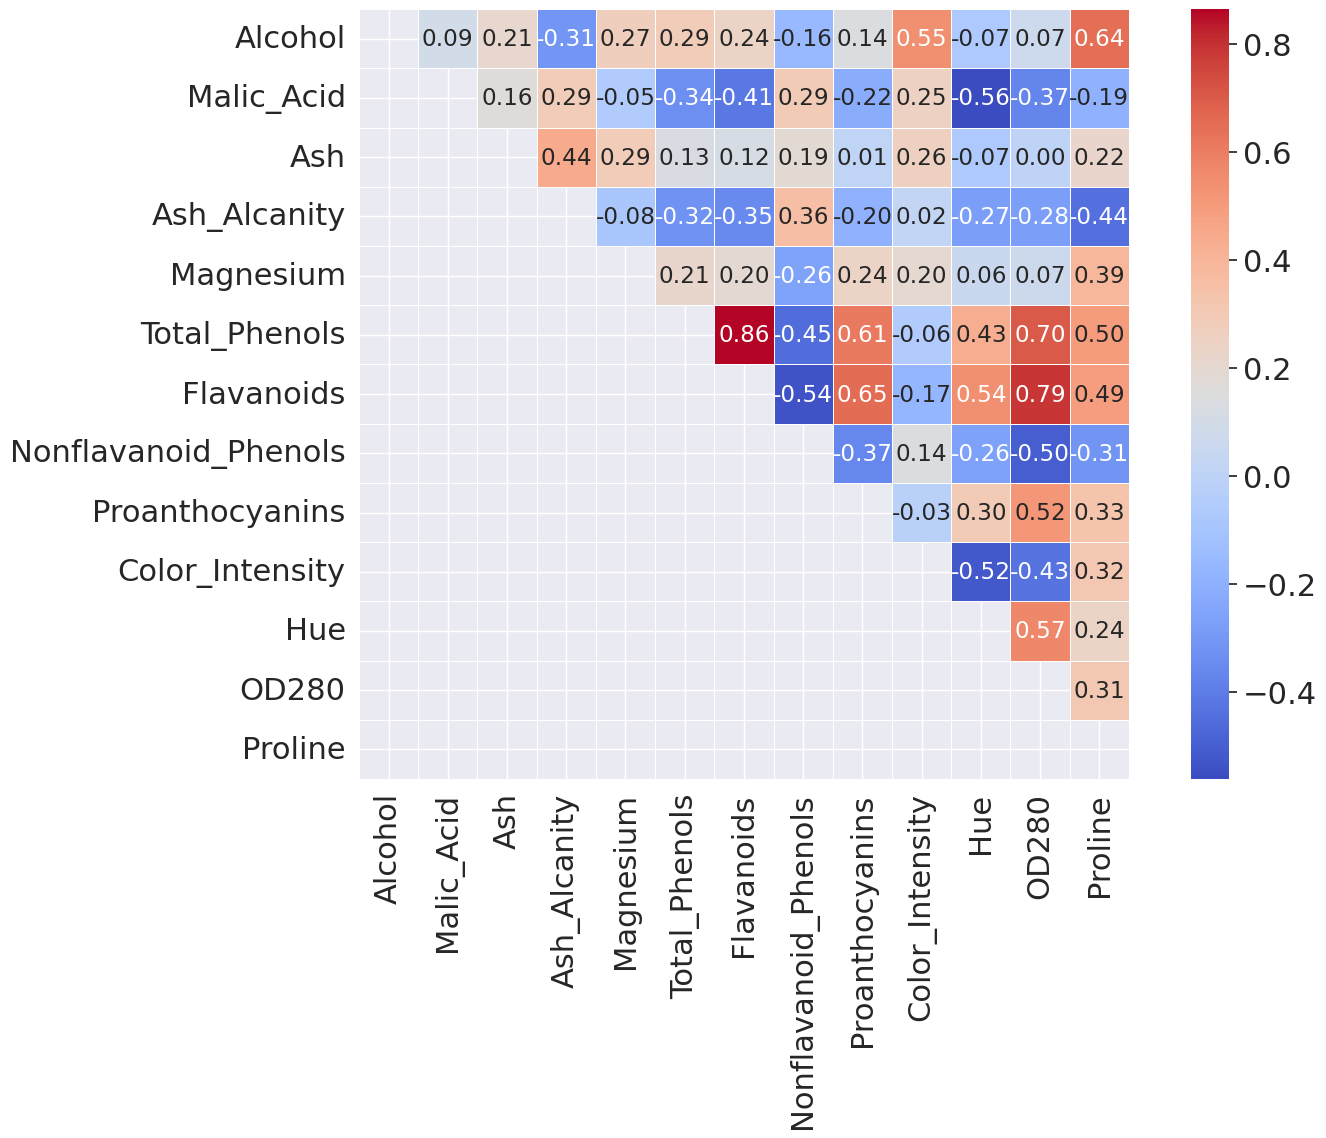

In [9]:
# Creating a heatmap of feature correlation
plt.figure(figsize=(16, 10))
mask = np.tril(data.corr())
sns.heatmap(data.corr(), cmap="coolwarm", annot=True, fmt='.2f', annot_kws={'size': 'x-small'}, linewidths=0.5, square=True, mask=mask);

The heatmap above gives us an idea of what features may be correlated to each other. The strongest correlation here is between Total_Phenols and Flavanoids at 0.86. With a quick wikipedia search, one would be able to provide a reasoning for this strong correlation. In fact, flavonoids are just a subcategory of natural phenols that can be found in wine. Another strong correlation exists between Flavanoids and OD280 at 0.79. 

https://en.wikipedia.org/wiki/Phenolic_content_in_wine

<a id="edasummary"></a>
## EDA Summary

Through the EDA above, we were firstly able to determine the overall structure of the dataset. There are 178 total entries (rows) and 13 features (columns) in the dataset. The data types of each column are numerical and are either float64 or int64. After checking for null values, we found that there are none. Next, histograms and boxplots highlighted the distribution of the data. There is significant left-sided skew for Proline, Color_Intensity, Magnesium, and Malic_Acid. Furthermore, several features have outlier values. However, these values will not be dropped from the dataset. Lastly, a heatmap shows strong correlations between Total_Phenols and Flavanoids (0.86) and between Flavanoids and OD280 (0.79). Both correlations can be explained by brief research into the phenolic content of wine. 

<a id="datapre"></a>
# **Data Preprocessing**

<a id="scaling"></a>
## Scaling Data

In [10]:
# Applying StandardScaler()
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)

By applying StandardScaler(), we can preprocess the data to prepare it for PCA, K-Means, and t-SNE. 

<a id="pca"></a>
## Principal Component Analysis

In [11]:
# Applying PCA, n_components = 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data_scaled)
pca_data = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])
print('Shape after PCA: ', pca_data.shape)
print('Original shape: ', data_scaled.shape)
print ('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca.explained_variance_ratio_)))

Shape after PCA:  (178, 2)
Original shape:  (178, 13)
Cumulative variance explained by 2 principal components: 55.41%


Here, we use Principal Component Analysis (PCA) to reduce the dimensionality of the data. While we may lose some variance, using PCA will assist in creating better visualizations. Above, you can see that by applying PCA, the structure of the dataset is now 178 rows and 2 columns (principal components). Furthermore, we can see that using just 2 principal components captures 55.41% of the total variance. 

Text(0.5, 1.0, 'PCA Plot')

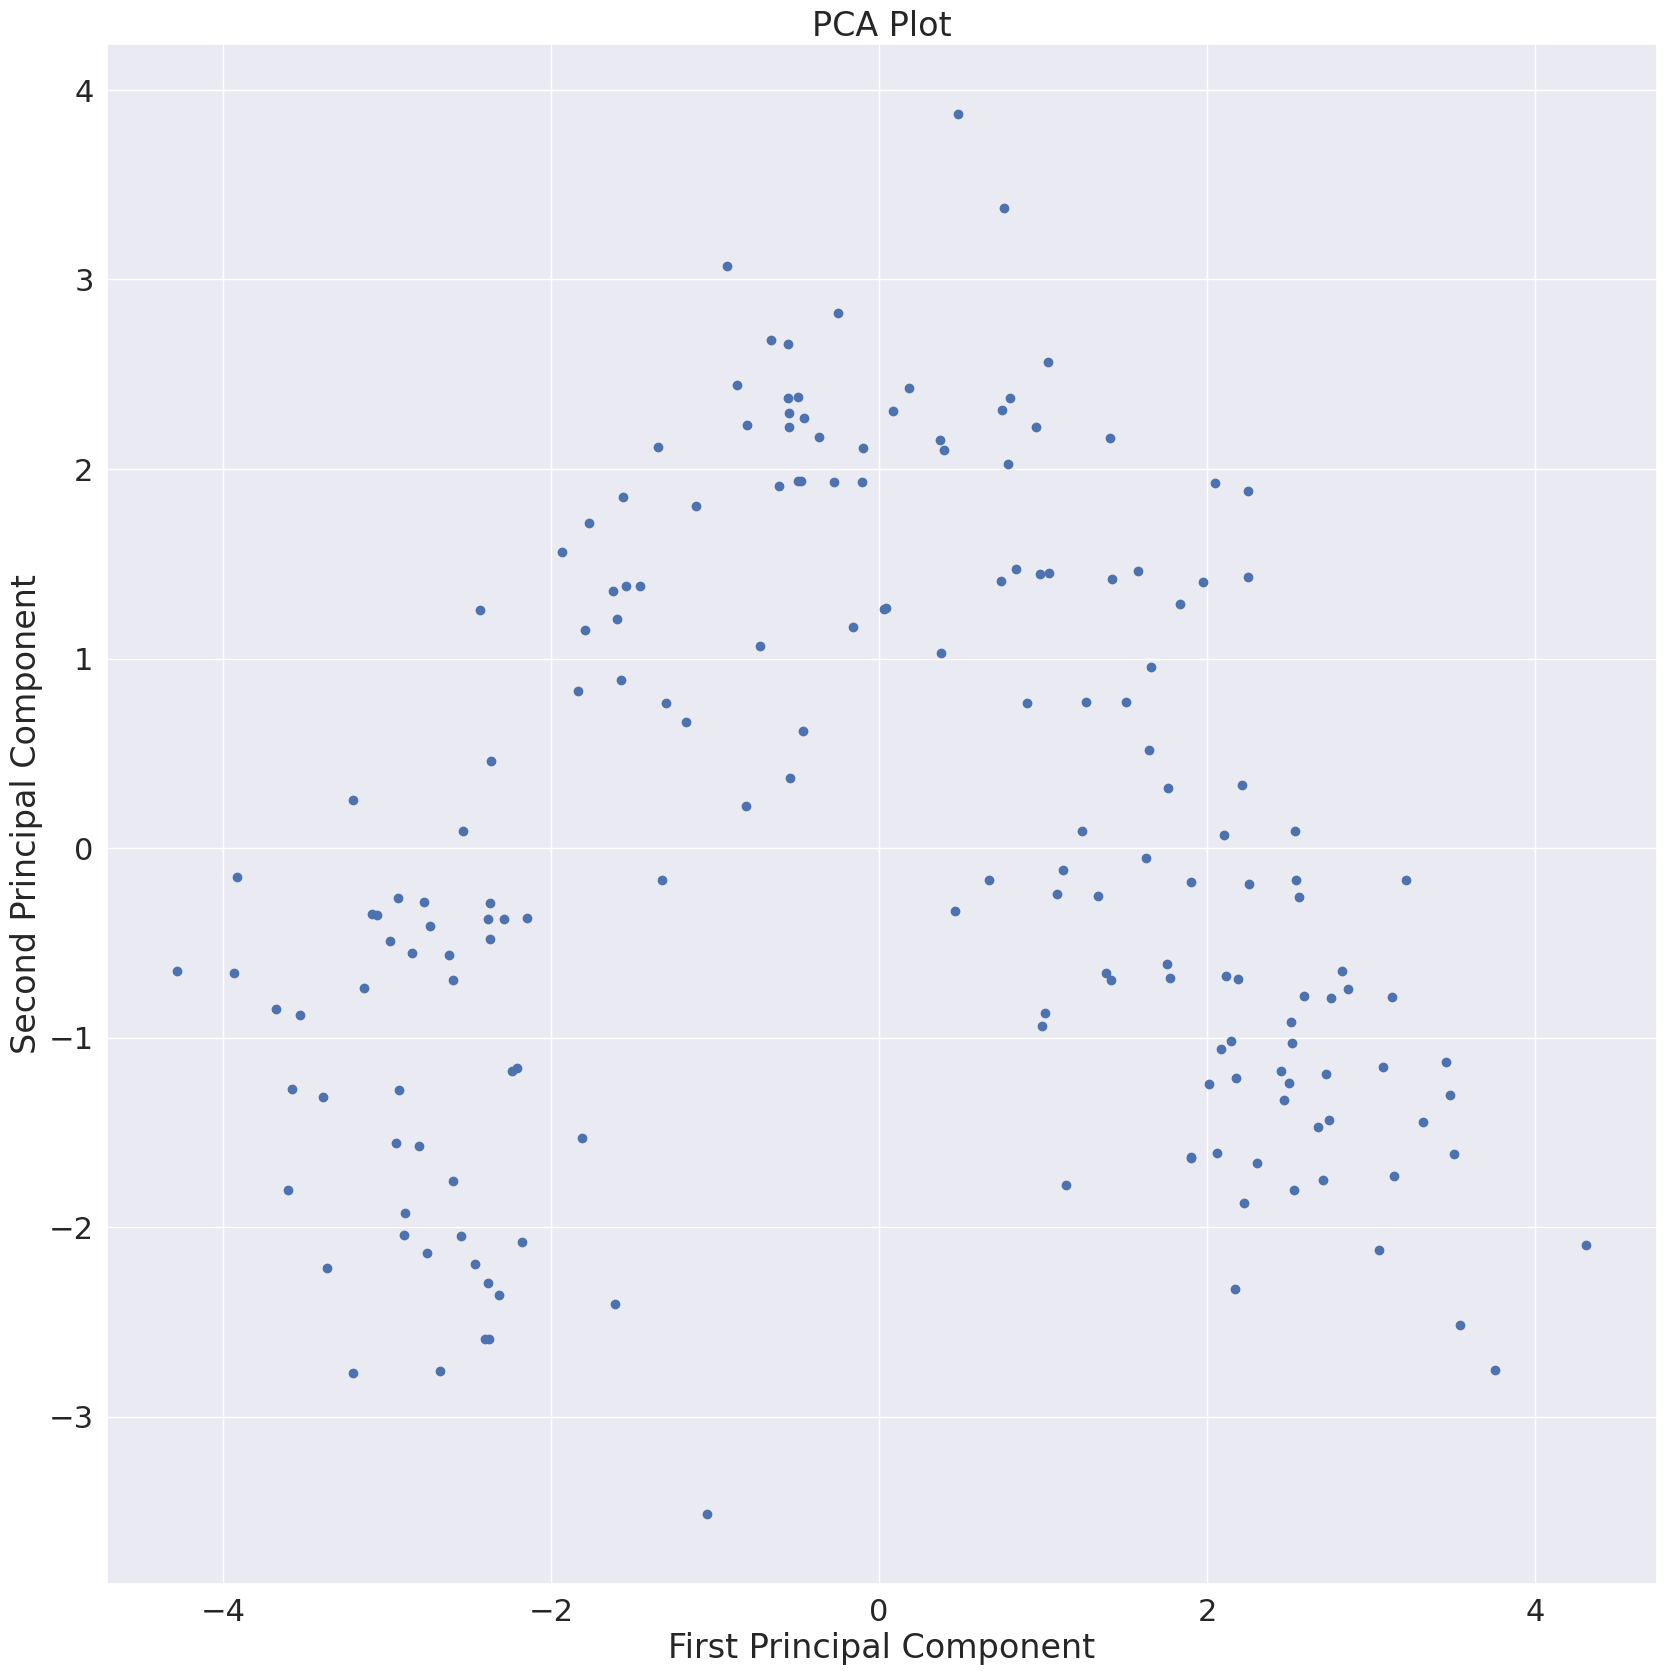

In [12]:
# Plotting PCA, n_components = 2
plt.scatter(pca_data.iloc[:,0],pca_data.iloc[:,1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Plot')

The plot above shows us the data clustered by the first and second principal components. This plot doesn't provide much useful information at the moment, as there are no unique colors used to signify distinct groups. We will use k-Means next to cluster this data points into groups. 

<a id="clustering"></a>
# **Clustering**

<a id="elbow"></a>
## Elbow Method

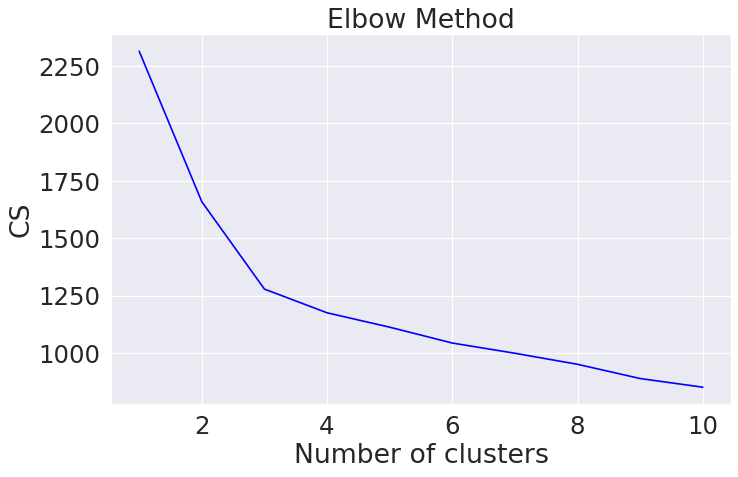

In [13]:
# Applying elbow method to determine optimal n_clusters
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(data_scaled)
    cs.append(kmeans.inertia_)

plt.figure(figsize=(10, 6), dpi=80)
plt.plot(range(1, 11), cs, color='blue')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

By using the Elbow Method, we are able to determine the optimal number of clusters for the k-Means algorithm. The plot above shows that n_clusters = 3 is the most ideal.

<a id="dendro"></a>
## Dendrogram

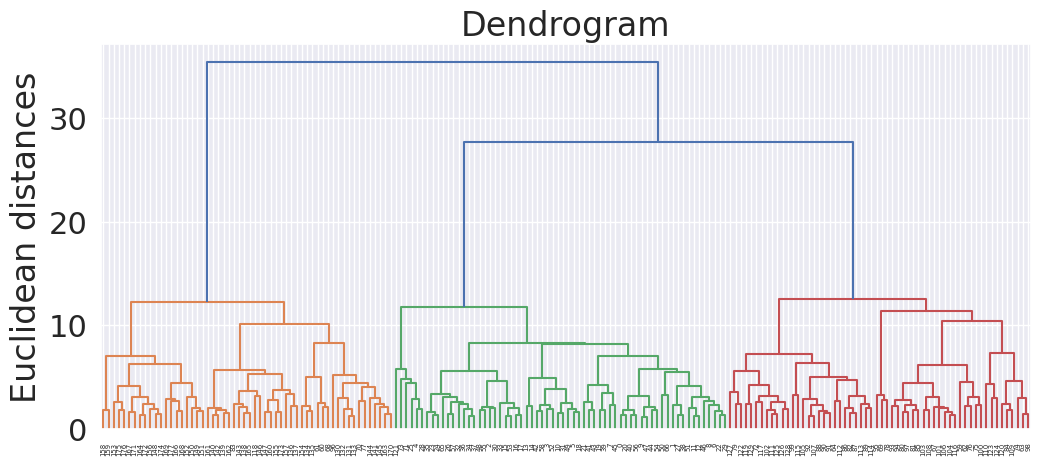

In [14]:
# Plotting a dendrogram
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot
pyplot.figure(figsize=(12, 5))
dendrogram = sch.dendrogram(sch.linkage(data_scaled, method = 'ward'))
plt.title('Dendrogram')
plt.ylabel('Euclidean distances')
plt.show()

Although we have already concluded that n_clusters = 3 is optimal for k-Means, we can also employ a dendrogram to confirm and visualize this number of clusters. Above, you can see three uniquely colored subgroups (orange, green, and red). These groups are created by three main splits which are based upon their hierarchical distances. Although dendrograms are typically used for agglomerative hierarchical clustering, this visualization is still helpful here, as it further demonstrates the ideal number of clusters. 

<a id="kmeans"></a>
## k-Means

In [15]:
# Applying KMeans
kmeans = KMeans(n_clusters = 3, n_init = 15, max_iter = 500, random_state = 42)
clusters = kmeans.fit_predict(data_scaled)

In [16]:
# Creating cluster centers
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'Principal Component 2')

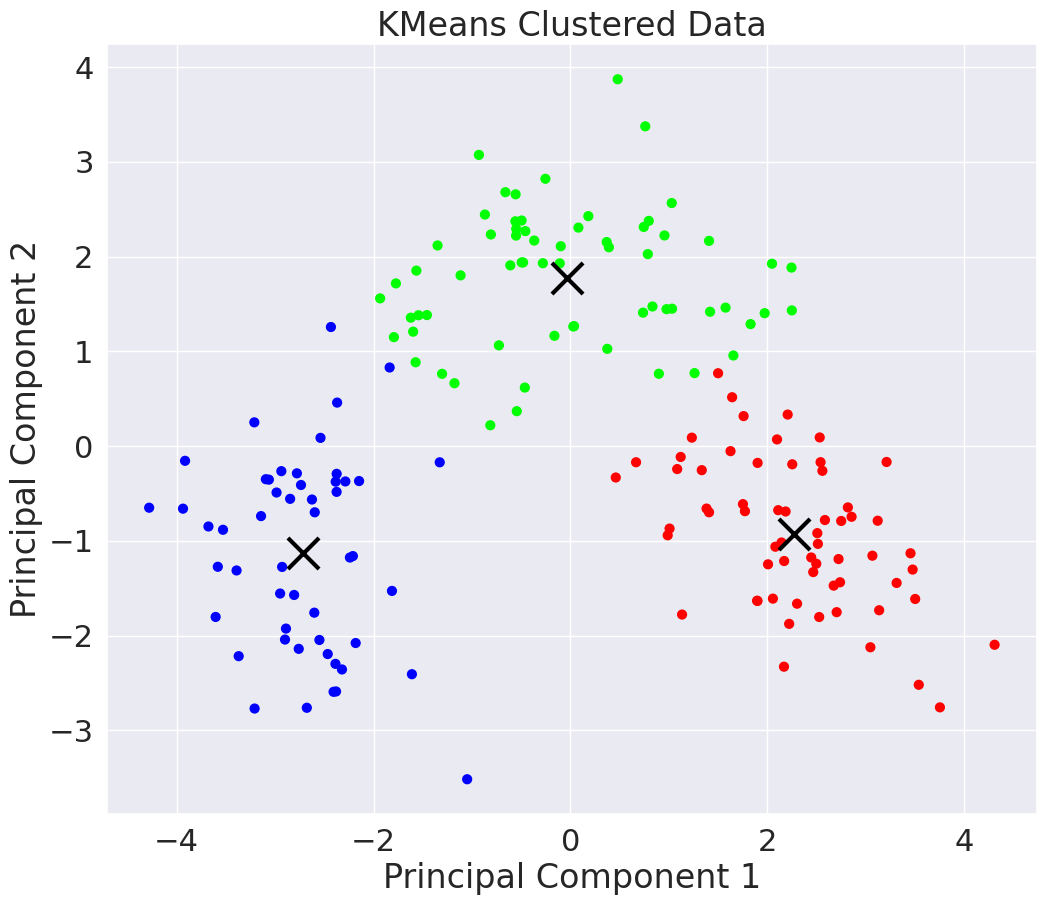

In [17]:
# Plotting PCA in color
plt.figure(figsize=(12,10))
plt.scatter(pca_data.iloc[:,0], pca_data.iloc[:,1], c=clusters, cmap="brg", s=40)
plt.scatter(x=centroids_pca[:,0], y=centroids_pca[:,1], marker="x", s=500, linewidths=3, color="black")
plt.title('KMeans Clustered Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

By using k-Means to cluster the data, we are able to further enchance our PCA plot. Above, you can see the data grouped into three clusters, colored blue, green, and red. Furthermore, each group of datapoints is clustered around its nearest centroid (marked by an X).  

<a id="tsne"></a>
## t-SNE

In [18]:
# Apply t-SNE
tsne = TSNE(n_components = 2)
X_tsne = tsne.fit_transform(data_scaled)
tsne_data = pd.DataFrame(data = X_tsne, columns = ['tsne comp. 1', 'tsne comp. 2'])

Text(0, 0.5, 't-SNE Component 2')

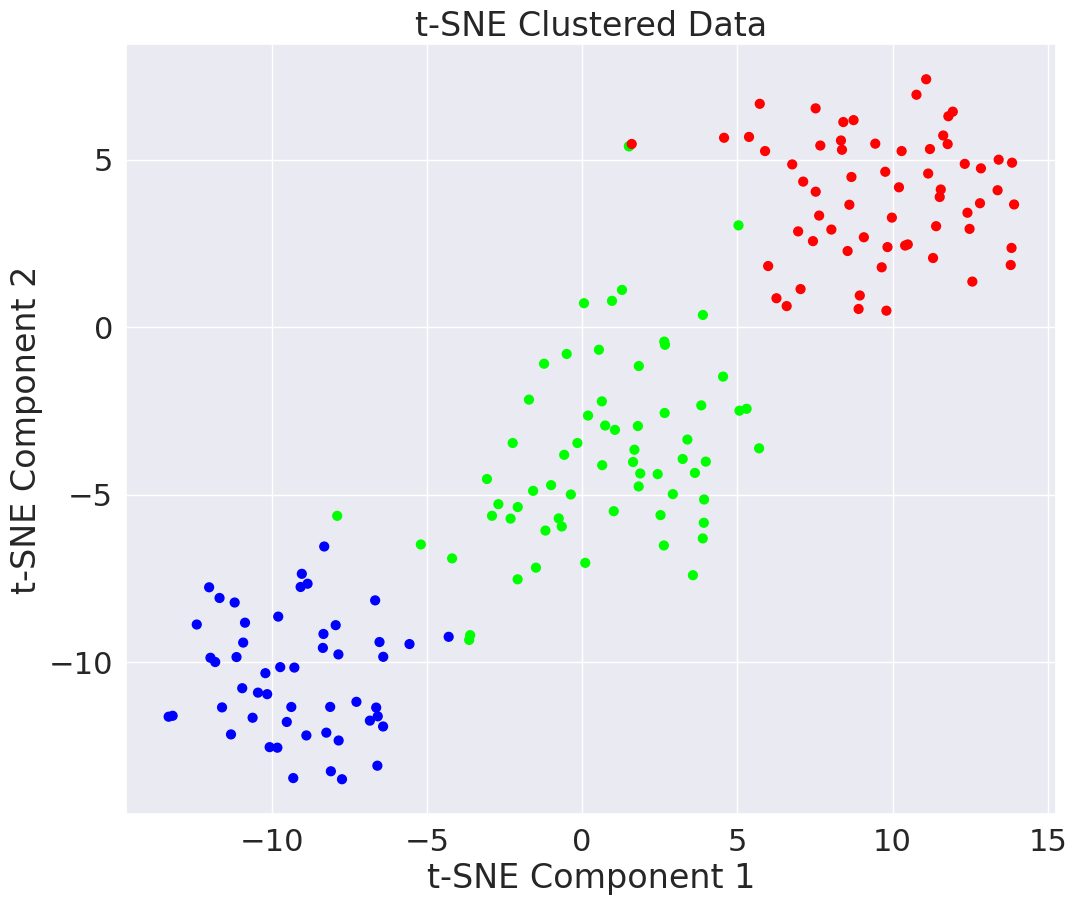

In [19]:
# Plotting t-SNE Clusters
plt.figure(figsize=(12,10))
plt.scatter(tsne_data.iloc[:,0], tsne_data.iloc[:,1], c=clusters, cmap="brg", s=40)
plt.title('t-SNE Clustered Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

The plot above shows the data clustered by using t-SNE. Unlike k-Means, which clustered the data into three groups based upon their first and second principal components (determined by the PCA), the t-SNE algorithm has plotted the data by its first and second t-SNE components. Because of this, the k-Means and t-SNE plots appear to have clustered the data differently. 

<a id="conclusion"></a>
# **Conclusion**

This project explored the ability of unsupervised clustering techniques to group a wine dataset into three distinct groups based upon the characteristics of the wines. In order to prepare the dataset for unsupervised learning, the data was first scaled with a Standard Scaler and then had its dimensionality reduced through Principal Component Analysis. Through the PCA, it was found that just 2 principal components captured 55.41% of the variance of the data. While 2 components seemed sufficient for this project, it was also found that 3 components accounted for roughly 2/3 of the total variance. After reducing the dimensionality of the dataset, the k-Means algorithm was used to cluster the data. Although k-Means is one of the most reliable and fast clustering algorithms, its main downside is that the value of k (or number of clusters) must be determined prior to utilizing the algorithm. In order to remedy this, the Elbow Method was used and determined that the optimal number of clusters was 3. Furthermore, for visual purposes, a dendrogram was created and also suggested that the data would suitably fit into three main clusters. Finally, k-Means with n_clusters = 3 yielded a plot which grouped the data into three clusters based around their centroids and based upon the first and second principal components. Next, t-SNE was used to compare its clusters to the ones gained from using k-Means. The t-SNE clustering algorithm was plotted based upon its first and second t-SNE components. The positions of the clusters varied from that of the k-Means plot, but t-SNE was still able to group the data into 3 clusters. When compared to eachother, t-SNE tends to be a slower algorithm than k-Means. As stated above, k-Means is a relatively reliable and faster clustering algorithm. Contrary to this, t-SNE works differently from PCA in that its resulting representation is non-linear, which sometimes makes it harder to interpret. 

## References

- https://www.kaggle.com/datasets/harrywang/wine-dataset-for-clustering?datasetId=626341&sortBy=voteCount
- https://www.kaggle.com/code/rodrigofragoso/explained-k-means-pca-visualization
- https://www.kaggle.com/code/aryantyagi19/wine-analysis-clustering-and-classification#IMPORTING-LIBRARIES
- https://www.kaggle.com/code/mysha1rysh/wine-clustering-with-k-means
- https://en.wikipedia.org/wiki/Phenolic_content_in_wine
- https://www.kaggle.com/code/samuelcortinhas/intro-to-pca-t-sne-umap